## Ingenieria de caracteristicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings

In [2]:
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [3]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("max_info_columns",200)
pd.set_option("max_info_columns", 200)
warnings.filterwarnings('ignore')

## Analisis Exploratorio

### Cargue de archivos

In [5]:
path = Path(f'G:\\.shortcut-targets-by-id\\1WzWuVgblSu3WLB69esgXUlpTSY7vJ_j4\\COMPARTIDA\\comjpp01\\personal\\Ingenieria de sistemas\\35_Analisis de datos\\Unidad 3 - Etapa 4 - Aprendizaje supervisado')
df = pd.read_csv(f'{path}\\Cleaned-Data.csv')

### visualización de dataframe

In [6]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


### Ver dimiension de los datos

In [7]:
print(f'dimensionalidad: {df.shape}')

dimensionalidad: (316800, 27)


### ver tipo de datos de los dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

### Valores unicos por variable

In [9]:
df.nunique()

Fever                       2
Tiredness                   2
Dry-Cough                   2
Difficulty-in-Breathing     2
Sore-Throat                 2
None_Sympton                2
Pains                       2
Nasal-Congestion            2
Runny-Nose                  2
Diarrhea                    2
None_Experiencing           2
Age_0-9                     2
Age_10-19                   2
Age_20-24                   2
Age_25-59                   2
Age_60+                     2
Gender_Female               2
Gender_Male                 2
Gender_Transgender          2
Severity_Mild               2
Severity_Moderate           2
Severity_None               2
Severity_Severe             2
Contact_Dont-Know           2
Contact_No                  2
Contact_Yes                 2
Country                    10
dtype: int64

### Ver estadisticas del dataframe

In [10]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,"316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00","316,800.00"
mean,0.31,0.50,0.56,0.50,0.31,0.06,0.36,0.55,0.55,0.36,0.09,0.20,0.20,0.20,0.20,0.20,0.33,0.33,0.33,0.25,0.25,0.25,0.25,0.33,0.33,0.33
std,0.46,0.50,0.50,0.50,0.46,0.24,0.48,0.50,0.50,0.48,0.29,0.40,0.40,0.40,0.40,0.40,0.47,0.47,0.47,0.43,0.43,0.43,0.43,0.47,0.47,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.50,1.00,0.50,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

### Variables con valores faltantes

In [12]:
df.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

## Modelo arbol de decision

In [13]:
df["Country"] = df["Country"].astype("category").cat.codes

In [14]:
df["COVID"] = np.random.randint(2,size=len(df))

In [15]:
df["COVID"] = df["COVID"].astype(str)
x = df.drop(columns=['COVID'])
y = df["COVID"]

In [16]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
arbol_decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
arbol_decision.fit(x_entrenamiento, y_entrenamiento) # entrenan los datos a partir de los datos de entrenamiento

DecisionTreeClassifier(criterion='entropy', max_depth=7)

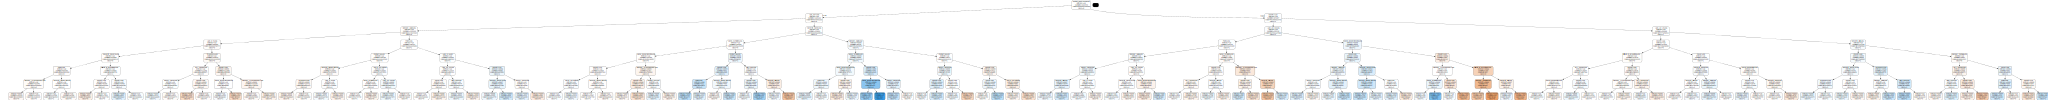

In [18]:
dot_data = export_graphviz(arbol_decision, out_file=None, feature_names=x.columns,  
                           class_names=y.unique(), filled=True, rounded=True, special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"120!"')
graph = graphviz.Source(pydot_graph.to_string())
graph

In [19]:
graph.render("C:/Users/comjpp01/Desktop/my_graph.pdf", format="pdf")

'C:\\Users\\comjpp01\\Desktop\\my_graph.pdf.pdf'

In [20]:
# Obtener la importancia de las variables
importancia = arbol_decision.feature_importances_

# Mostrar la importancia de las variables en orden descendente
indice_ordenado = importancia.argsort()[::-1]
for i in indice_ordenado:
    print(f'{x_entrenamiento.columns[i]}: {importancia[i]}')

Country: 0.1926575004442807
Severity_Mild: 0.06392447299092355
Runny-Nose: 0.05700945218375268
None_Experiencing: 0.050641755053990496
Gender_Male: 0.04767818961338287
Fever: 0.04693792558621048
Pains: 0.046658492195507245
Dry-Cough: 0.04606759525023504
Diarrhea: 0.042295938895528525
Age_0-9: 0.0418242549301905
Severity_Moderate: 0.03992216519825646
Gender_Transgender: 0.03753966821334803
Severity_None: 0.033536830704057684
Severity_Severe: 0.03163402389296417
None_Sympton: 0.03019202584816303
Tiredness: 0.029008370485636297
Contact_No: 0.02520715168787941
Age_10-19: 0.024925980761234562
Difficulty-in-Breathing: 0.022296187882752495
Nasal-Congestion: 0.016233393049241502
Gender_Female: 0.015404297751716528
Sore-Throat: 0.015004962340743591
Age_25-59: 0.013033607032595993
Contact_Dont-Know: 0.011124622019803285
Age_20-24: 0.00716028994694698
Age_60+: 0.0071517367693257035
Contact_Yes: 0.004929109271332039


In [21]:
prediccionArbol = arbol_decision.predict(x_prueba)
tablaCruzadaArbol = pd.crosstab(y_prueba, prediccionArbol,margins=True)
tablaCruzadaArbol

col_0,0,1,All
COVID,,,
0,17167,14618,31785
1,16920,14655,31575
All,34087,29273,63360


## MODELO KNN

In [22]:
# Crear el modelo KNN con n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=6)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(x_entrenamiento, y_entrenamiento)

score = knn.score(x_prueba, y_prueba)

In [ ]:
prediccionKnn = knn.predict(x_prueba)
tablaCruzadaKnn= pd.crosstab(y_prueba, prediccionKnn,margins=True)
tablaCruzadaKnn

## MODELO NAIVE BAYES

In [ ]:
model = MultinomialNB()
model.fit(x_entrenamiento,y_entrenamiento)

In [ ]:
# Clasificación de una nueva opinión
new_opinion = ['Este producto es muy malo']
new_opinion_vect = vectorizer.transform(new_opinion)
prediction = model.predict(new_opinion_vect)

# Resultado de la clasificación
if prediction == 1:
    print('La opinión es positiva')
else:
    print('La opinión es negativa')

### GIT
https://github.com/jancelperez/ciencia_datos_UNAD.git

## Bibliografia

References
Descenso de gradiente. (n.d.). Khan Academy. Retrieved April 2, 2023, from https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent

Rodríguez, D. (2020, April 20). Entrenamiento, validación y test con Scikit-learn. Analytics Lane. https://www.analyticslane.com/2020/04/20/entrenamiento-validacion-y-test-con-scikit-learn/

Roy, B. (2020, July 10). Todo Sobre El manejo De Datos Faltantes. DataSource.Ai. https://www.datasource.ai/es/data-science-articles/todo-sobre-el-manejo-de-datos-faltantes

Selección de características en el proceso de ciencia de datos en equipos - Azure Architecture Center. (n.d.). Microsoft.com. Retrieved April 2, 2023, from https://learn.microsoft.com/es-es/azure/architecture/data-science-process/select-features

Wikipedia contributors. (n.d.). Validación cruzada. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Validaci%C3%B3n_cruzada&oldid=124047241

(N.d.). Amazon.com. Retrieved April 2, 2023, from https://aws.amazon.com/es/what-is/feature-engineering/